In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
#Instalando pacotes e implementando bibliotecas

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as mp
import numpy as np
import statistics as st

dfAnalise = pd.io.gbq.read_gbq('''
  SELECT  * FROM `fiap-challenge-5.resultado_final.ds_covid_pr` as covid
  INNER JOIN `fiap-challenge-5.resultado_final.ds_sales_iowa_srw` as sales
  ON sales.date = covid.data_notificacao 
''', project_id='fiap-challenge-5', dialect='standard')

dfAnalise =  dfAnalise[['date', 'ocupacao_CovidUti', 'item_description','bottles_sold','ocupacao_CovidCli']]

#Aplicando filtros no dataset para o produto Old Overholt Rye
dfAnalise = dfAnalise.loc[dfAnalise.item_description == 'Old Overholt Rye']

#Informações do dataset
dfAnalise.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 226
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               12 non-null     datetime64[ns]
 1   ocupacao_CovidUti  12 non-null     int64         
 2   item_description   12 non-null     object        
 3   bottles_sold       12 non-null     int64         
 4   ocupacao_CovidCli  12 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 576.0+ bytes


In [ ]:
dfAnalise.corr()

,ocupacao_CovidUti,bottles_sold,ocupacao_CovidCli
ocupacao_CovidUti,1.000000,-0.049496,0.836591
bottles_sold,-0.049496,1.000000,-0.024418
ocupacao_CovidCli,0.836591,-0.024418,1.000000


In [ ]:
#Cáculo das medidas de tendêncial central 
print("****************************************************************************************************************************")
print("Cáculo das medidas de tendência central do dataset Covid no Paraná e Empresa Liquor Sales na cidade de IOWA no Ano de 2020 *")
print("****************************************************************************************************************************")
print("")
#Cáculo da média leitos UTI e clínicos ocupados por COVID
print("Média leitos UTI ocupados por COVID:",st.mean(dfAnalise.ocupacao_CovidUti))
print("Média leitos Clínicos ocupados por COVID:",st.mean(dfAnalise.ocupacao_CovidCli))

#Cáculo da média de garrafas Old Overholt Rye	vendidas pela Empresa Liquor Sales
print("Média de garrafas Old Overholt Rye vendidas:",st.mean(dfAnalise.bottles_sold))
print("")

#Cáculo da mediana de leitos UTI e clínicos ocupados por COVID
print("Mediana dos leitos UTI ocupados por COVID:",st.median(dfAnalise.ocupacao_CovidUti))
print("Mediana dos leitos Clínicos ocupados por COVID:",st.median(dfAnalise.ocupacao_CovidCli))

#Cáculo da mediana de garrafas Old Overholt Rye	vendidas
print("Mediana de garrafas Old Overholt Rye vendidas:",st.median(dfAnalise.bottles_sold))
print("")

#Cáculo da moda de leitos UTI e clínicos ocupados por COVID
print("Moda dos leitos UTI ocupados por COVID:",st.mode(dfAnalise.ocupacao_CovidUti))
print("Moda dos leitos Clínicos ocupados por COVID:",st.mode(dfAnalise.ocupacao_CovidCli))

#Cáculo da moda de garrafas Old Overholt Rye vendidas
print("Moda de garrafas Old Overholt Rye vendidas:",st.mode(dfAnalise.bottles_sold))
print("")

#Cálculo dos quartis de leitos UTI e clínicos ocupados por COVID
print("1º quartil dos leitos UTI ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidUti, 0.25))
print("2º quartil dos leitos UTI ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidUti, 0.50))
print("3º quartil dos leitos UTI ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidUti, 0.75))
print("")
print("1º quartil dos leitos Clínicos ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidCli, 0.25))
print("2º quartil dos leitos Clínicos ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidCli, 0.50))
print("3º quartil dos leitos Clínicos ocupados por COVID:",np.quantile(dfAnalise.ocupacao_CovidCli, 0.75))
print("")

#Cálculo dos quartis de garrafas Old Overholt Rye vendidas
print("1º quartil de garrafas Old Overholt Rye vendidas:",np.quantile(dfAnalise.bottles_sold, 0.25))
print("2º quartil de garrafas Old Overholt Rye vendidas:",np.quantile(dfAnalise.bottles_sold, 0.50))
print("3º quartil de garrafas Old Overholt Rye vendidas:",np.quantile(dfAnalise.bottles_sold, 0.75))
print("")

#Cáculo das medidas de dispersão de leitos UTI e clínicos ocupados por COVID
print("******************************************************************************************************************")
print("Cáculo das medidas de dispersão do dataset Covid no Paraná e Empresa Liquor Sales na cidade de IOWA no Ano de 2020")
print("******************************************************************************************************************")
print("")
#varianca populacional de leitos UTI e clínicos ocupados por COVID
print("Variância populacional dos leitos UTI ocupados por COVID:",st.pvariance(dfAnalise.ocupacao_CovidUti))
print("Variância populacional dos leitos Clínicos ocupados por COVID:",st.pvariance(dfAnalise.ocupacao_CovidCli))

#varianca populacional de garrafas Old Overholt Rye vendidas
print("Variância populacional de garrafas Old Overholt Rye vendidas:",st.pvariance(dfAnalise.bottles_sold))
print("")

#desvio padrao de leitos UTI e clínicos ocupados por COVID
print("Desvio padrao dos leitos UTI ocupados por COVID:",st.pstdev(dfAnalise.ocupacao_CovidUti))
print("Desvio padrao dos leitos Clínicos ocupados por COVID:",st.pstdev(dfAnalise.ocupacao_CovidCli))

#desvio de garrafas Old Overholt Rye vendidas
print("Desvio padrao de garrafas Old Overholt Rye vendidas:",st.pstdev(dfAnalise.bottles_sold))
print("")

#desvio padrao amostral de leitos UTI e clínicos ocupados por COVID
print("Desvio padrao amostral dos leitos UTI ocupados por COVID:",st.stdev(dfAnalise.ocupacao_CovidUti))
print("Desvio padrao amostral dos leitos Clínicos ocupados por COVID:",st.stdev(dfAnalise.ocupacao_CovidCli))

#desvio padrao amostral de garrafas Old Overholt Rye vendidas
print("Desvio padrao amostral de garrafas Old Overholt Rye vendidas:",st.stdev(dfAnalise.bottles_sold))
print("")

#amplitude(a) de leitos UTI e clínicos ocupados por COVID
print("Amplitude(a) dos leitos UTI ocupados por COVID:",max(dfAnalise.ocupacao_CovidUti)- min(dfAnalise.ocupacao_CovidUti))
print("Amplitude(a) dos leitos Clínicos ocupados por COVID:",max(dfAnalise.ocupacao_CovidCli)- min(dfAnalise.ocupacao_CovidCli))

#amplitude(a) de garrafas Old Overholt Rye vendidas
print("Amplitude(a) de mortes sofridas pelo time blue:",max(dfAnalise.bottles_sold)- min(dfAnalise.bottles_sold))
print("")

#Intervalo interquartil de leitos UTI e clínicos ocupados por COVID
print("Intervalo interquartil dos leitos UTI ocupados por COVID:",np.percentile(dfAnalise.ocupacao_CovidUti, 75)-np.percentile(dfAnalise.ocupacao_CovidUti, 25))
print("Intervalo interquartil dos leitos Clínicos ocupados por COVID:",np.percentile(dfAnalise.ocupacao_CovidCli, 75)-np.percentile(dfAnalise.ocupacao_CovidCli, 25))

#Intervalo interquartil de garrafas Old Overholt Rye vendidas
print("Intervalo interquartil de garrafas Old Overholt Rye vendidas:",np.percentile(dfAnalise.bottles_sold, 75)-np.percentile(dfAnalise.bottles_sold, 25))
print("")

****************************************************************************************************************************
Cáculo das medidas de tendência central do dataset Covid no Paraná e Empresa Liquor Sales na cidade de IOWA no Ano de 2020 *
****************************************************************************************************************************

Média leitos UTI ocupados por COVID: 21.5
Média leitos Clínicos ocupados por COVID: 14.75
Média de garrafas Old Overholt Rye vendidas: 10.333333333333334

Mediana dos leitos UTI ocupados por COVID: 20.0
Mediana dos leitos Clínicos ocupados por COVID: 11.0
Mediana de garrafas Old Overholt Rye vendidas: 12.0

Moda dos leitos UTI ocupados por COVID: 20
Moda dos leitos Clínicos ocupados por COVID: 11
Moda de garrafas Old Overholt Rye vendidas: 12

1º quartil dos leitos UTI ocupados por COVID: 19.0
2º quartil dos leitos UTI ocupados por COVID: 20.0
3º quartil dos leitos UTI ocupados por COVID: 20.0

1º quartil dos leitos 

*************************************************************
Gráfico de frequência de ocupação dos leitos de UTI por COVID
*************************************************************



(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ]),
 <a list of 10 Patch objects>)

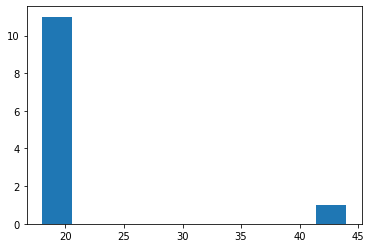

In [ ]:
#Gráfico de frequência de ocupação dos leitos UTI ocupados por COVID
print("*************************************************************")
print("Gráfico de frequência de ocupação dos leitos de UTI por COVID")
print("*************************************************************")
print("")
mp.hist(dfAnalise.ocupacao_CovidUti)

************************************************************************
Gráfico de frequência de ocupação dos leitos Clínicos ocupados por COVID
************************************************************************



(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 9. , 14.1, 19.2, 24.3, 29.4, 34.5, 39.6, 44.7, 49.8, 54.9, 60. ]),
 <a list of 10 Patch objects>)

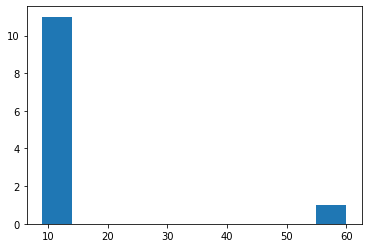

In [ ]:
#Gráfico de frequência de ocupação dos leitos Clínicos ocupados por COVID
print("************************************************************************")
print("Gráfico de frequência de ocupação dos leitos Clínicos ocupados por COVID")
print("************************************************************************")
print("")
mp.hist(dfAnalise.ocupacao_CovidCli)

************************************************************
Gráfico de frequência de vendas de garrafas Old Overholt Rye
************************************************************



(array([3., 1., 0., 0., 7., 0., 0., 0., 0., 1.]),
 array([ 3. ,  5.1,  7.2,  9.3, 11.4, 13.5, 15.6, 17.7, 19.8, 21.9, 24. ]),
 <a list of 10 Patch objects>)

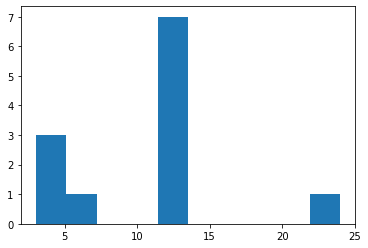

In [ ]:
#Gráfico de frequência de vendas de garrafas Old Overholt Rye
print("************************************************************")
print("Gráfico de frequência de vendas de garrafas Old Overholt Rye")
print("************************************************************")
print("")
mp.hist(dfAnalise.bottles_sold)

**************************************************************
Teste de normalidade para ocupação dos leitos de UTI por COVID
**************************************************************



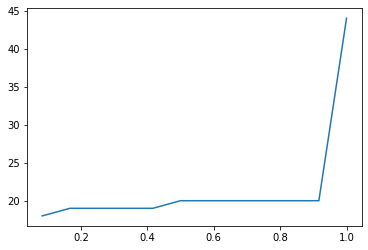

In [ ]:
#Teste de normalidade
# Distribuicao de frequencia
#1. Calcular os quartis
print("**************************************************************")
print("Teste de normalidade para ocupação dos leitos de UTI por COVID")
print("**************************************************************")
print("")

quantis = []
for i in range (1,dfAnalise.ocupacao_CovidUti.size+1):
  quantis.append(i/dfAnalise.ocupacao_CovidUti.size)
np.quantile(dfAnalise.ocupacao_CovidUti, quantis)
mp.plot(quantis, dfAnalise.ocupacao_CovidUti.sort_values())

*************************************************************************
Teste de normalidade para ocupação dos leitos Clínicos ocupados por COVID
*************************************************************************



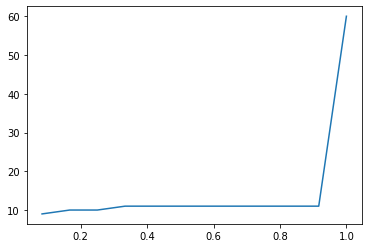

In [ ]:
#Teste de normalidade
# Distribuicao de frequencia
#1. Calcular os quartis
print("*************************************************************************")
print("Teste de normalidade para ocupação dos leitos Clínicos ocupados por COVID")
print("*************************************************************************")
print("")

quantis = []
for i in range (1,dfAnalise.ocupacao_CovidCli.size+1):
  quantis.append(i/dfAnalise.ocupacao_CovidCli.size)
np.quantile(dfAnalise.ocupacao_CovidCli, quantis)
mp.plot(quantis, dfAnalise.ocupacao_CovidCli.sort_values())

***********************************************************
Teste de normalidade de vendas de garrafas Old Overholt Rye
***********************************************************



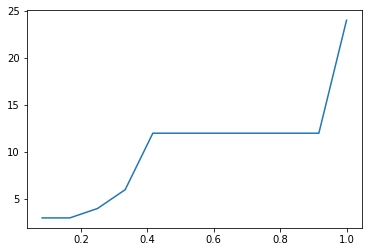

In [ ]:
#Teste de normalidade
# Distribuicao de frequencia
#1. Calcular os quartis
print("***********************************************************")
print("Teste de normalidade de vendas de garrafas Old Overholt Rye")
print("***********************************************************")
print("")

quantis = []
for i in range (1,dfAnalise.bottles_sold.size+1):
  quantis.append(i/dfAnalise.bottles_sold.size)
np.quantile(dfAnalise.bottles_sold, quantis)
mp.plot(quantis, dfAnalise.bottles_sold.sort_values())

In [ ]:
#Regressão Linear
model = sm.OLS(dfAnalise.ocupacao_CovidUti , dfAnalise.bottles_sold).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      ocupacao_CovidUti   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.591
Method:                 Least Squares   F-statistic:                              18.37
Date:                Thu, 16 Jun 2022   Prob (F-statistic):                     0.00128
Time:                        21:54:24   Log-Likelihood:                         -48.525
No. Observations:                  12   AIC:                                      99.05
Df Residuals:                      11   BIC:                                      99.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bottles_sold     1.5193      0.354      4.286      0.001       0.739       2.300
==============================================================================
Omnibus:                        7.034   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                3.031
Skew:                           0.975   Prob(JB):                        0.220
Kurtosis:                       4.503   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statistics
statistics.variance(dfAnalise.ocupacao_CovidUti)

50.63636363636363

In [ ]:
statistics.variance(dfAnalise.ocupacao_CovidCli)

203.47727272727272

In [ ]:
statistics.variance(dfAnalise.bottles_sold)

33.87878787878788